# Waste Calculator

This jupyter notebook will calculate the solid e-waste produced by solar, wind, and nuclear energy on a per unit energy basis. Sources for assumptions will be included.

First we will calculate the waste produced by the solar farm at UIUC

## Solar: 
Cost per MWh: $45.99 \[[source](https://fs.illinois.edu/services/utilities-energy/production/solar-farms)\]

Mass of Commercial Panel: ~50 pounds \[[source](https://brightstarsolar.net/common-sizes-of-solar-panels/), 
[source](https://www.vivintsolar.com/learning-center/how-big-is-a-solar-panel)\]

Average Capacity Factor: ~17\% \[[source](https://go.illinois.edu/solar)\]

Expected Lifespan of Module: 30 years \[[source](https://www.irena.org/publications/2016/Jun/End-of-life-management-Solar-Photovoltaic-Panels)\]

[UIUC Solar Farm Data](https://icap.sustainability.illinois.edu/files/project/175/Solar%20Farm%20Fact%20Sheet_0.pdf)

In [28]:
rated_power = 4.68  # MW
average_cf = 0.17
n_mod = 18867
mod_weight = 50 / 2.205  # pounds to kg
life = 30  # years

In [29]:
def expected_output(power, capfac, lifespan):
    hours = 8760
    expected = (power*hours)*capfac*lifespan
    
    return expected

In [30]:
sf_output = expected_output(rated_power, average_cf, life)
print(f"Expected Power Output of UIUC solar farm 1.0: {sf_output} MWh")

Expected Power Output of UIUC solar farm 1.0: 209083.68 MWh


In [31]:
def waste_per_mwh(mass_waste, generation):
    """
    Calculates waste per MWh. Generation is expected in MWh
    and mass_waste is expected in kg.
    """
    
    waste = mass_waste/generation 
    return waste

In [32]:
sf_mass = n_mod * mod_weight  # kg
sf_waste = waste_per_mwh(sf_mass, sf_output)
print(f"UIUC Solar Farm 1.0 will produce {sf_waste} kg/MWh of solar panel waste.")

UIUC Solar Farm 1.0 will produce 2.046181362656811 kg/MWh of solar panel waste.


## Wind Power

UIUC has a PPA with Railsplitter Wind Farm. Which uses GE SLE 1.5MW wind turbines.

The weight to power ratio (t/MW): ~ 12.9 t/MW [source](https://www.sciencedirect.com/science/article/pii/S0956053X17300491)

Lifespan: ~ 20 years [source](https://www.sciencedirect.com/science/article/pii/S0956053X17300491)

Power = 100.5 MW [source](https://railsplitterwindfarm.com/)

Average Capacity Factor IL: 35\% [source](https://icap.sustainability.illinois.edu/files/project/2235/RailSplitter-Wind%20Farm-9.6.16.pdf)

In [33]:
rated_power = 100.5  # MW
weight_power = 12.9*1000  # kg/MW
average_cf = 0.35
life = 20  # years

In [34]:
wf_output = expected_output(rated_power, average_cf, life)
print(f"Expected Power Output of Railsplitter Wind Farm: {wf_output} MWh")

Expected Power Output of Railsplitter Wind Farm: 6162660.0 MWh


In [35]:
wf_mass = weight_power * rated_power
wf_waste = waste_per_mwh(wf_mass, wf_output)
print(f"Railsplitter Wind Farm will produce {wf_waste} kg/MWh of turbine waste.")

Railsplitter Wind Farm will produce 0.21037181996086105 kg/MWh of turbine waste.


## Nuclear Power
A slightly different calculation needs to be done because the nuclear waste is "spent nuclear fuel."
The only figure I can find for nuclear waste produced annually is from a DOE factsheet that states "2000 tons per year." [source](https://www.energy.gov/ne/articles/5-fast-facts-about-spent-nuclear-fuel)

In 2019, U.S. nuclear produced 809,409,000 MWh of electricity. [source](https://www.eia.gov/energyexplained/nuclear/us-nuclear-industry.php#:~:text=In%202019%2C%20the%20nuclear%20share,electricity%20generation%20was%20about%2020%25.)

In [36]:
np_mass = 2000 * 1000 # tons --> kg
nuc_gen = 809409000  # MWh(e)
np_waste = waste_per_mwh(np_mass, nuc_gen)
print(f"Nuclear plants will produce approximately {np_waste} kg/MWh(th) of spent nuclear fuel.")

Nuclear plants will produce approximately 0.002470938672537617 kg/MWh(th) of spent nuclear fuel.


### Nuclear Power (alternative calculation)

Alternatively, we can use numbers from the [IAEA "Status and Trends in Spent Fuel and Radioactive Waste Management"](https://www-pub.iaea.org/MTCD/Publications/PDF/P1799_web.pdf) report and the [World Nuclear Association](https://www.world-nuclear.org/information-library/nuclear-fuel-cycle/nuclear-wastes/radioactive-wastes-myths-and-realities.aspx#:~:text=The%20amount%20of%20HLW%20produced,of%20used%20fuel%20per%20year.)

Using a reference plant with 
- capacity of 1000 MW (1 GW). 
- lifespan of 60 years
- capacity factor of 92%
- produce 30 tonnes of waste per year

We can calculate the waste intensity of nuclear power similar to the reference solar farm, as before.



In [37]:
np_waste_per_year = 30 * 1000  # tons --> kg
nuc_cap = 1000  # MW
nuc_cf = 0.92  # 92% capacity factor
lifetime = 60  # years
hours = 8760  # hours per year
nuc_gen = expected_output(nuc_cap, nuc_cf, lifetime)  # lifetime megawatt hours
np_mass = np_waste_per_year*lifetime

np_waste_ub = waste_per_mwh(np_mass, nuc_gen)
print(f"Nuclear plants will produce approximately {np_waste_ub} kg/MWh(e) of spent nuclear fuel.")

Nuclear plants will produce approximately 0.0037224538415723644 kg/MWh(e) of spent nuclear fuel.


In [38]:
# lower bound with 25 tons per year

np_waste_per_year = 25 * 1000  # tons --> kg
nuc_cap = 1000  # MW
nuc_cf = 0.92  # 92% capacity factor
lifetime = 60  # years
hours = 8760  # hours per year
nuc_gen = expected_output(nuc_cap, nuc_cf, lifetime)  # lifetime megawatt hours
np_mass = np_waste_per_year*lifetime

np_waste_lb = waste_per_mwh(np_mass, nuc_gen)
print(f"Nuclear plants will produce approximately {np_waste_lb} kg/MWh(e) of spent nuclear fuel.")

Nuclear plants will produce approximately 0.0031020448679769702 kg/MWh(e) of spent nuclear fuel.


### Coal Plant Solid Waste

The most common operational solid wastes in coal plants are ash and scrubber slurries.  However, other solids are generated, such as anhydrite.  The solid waste value includes all such waste (see table 2.1 in source)

Total solid waste (lb/MWh) = 367 [source](https://www.energy.gov/sites/prod/files/2017/01/f34/Environment%20Baseline%20Vol.%203--Solid%20Waste%20from%20the%20Operation%20and%20Decommissioning%20of%20Power%20Plants.pdf)

This value is assuming the majority of coal plants are pulverized coal power plants, therefore, their generated wastes are a good representation of coal plants in general.

In [39]:
coal_waste = 367*(0.453592) # lbs -> kg
print(f"Coal plants will produce approximately {coal_waste} kg/MWh(e) of solid waste.")

Coal plants will produce approximately 166.468264 kg/MWh(e) of solid waste.


### Comparing Waste Intensity

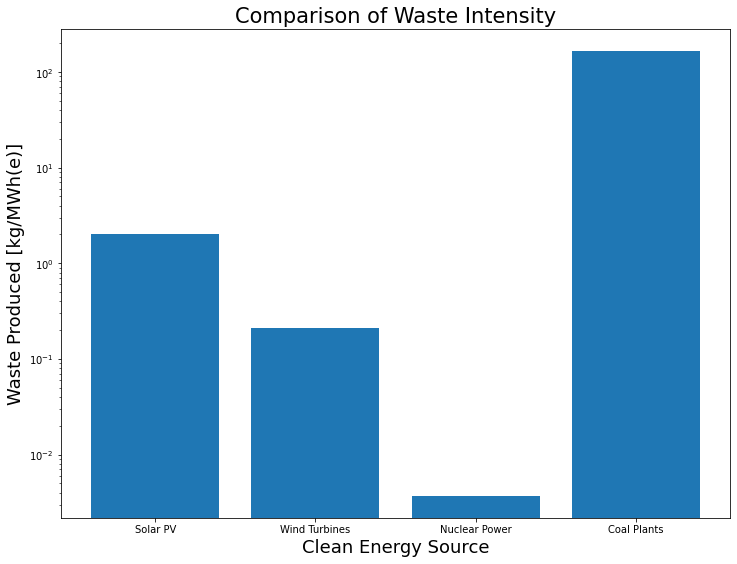

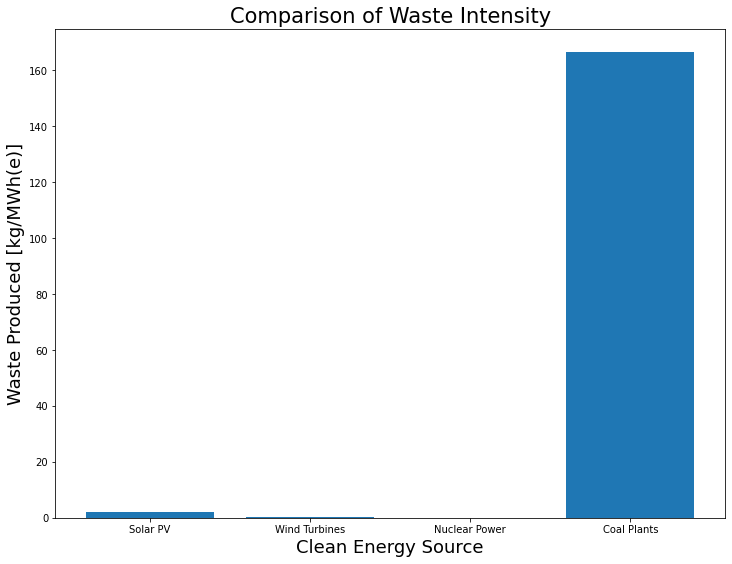

In [40]:
import matplotlib.pyplot as plt


waste = {'Solar PV': sf_waste, 'Wind Turbines':wf_waste, 'Nuclear Power': np_waste_ub, 'Coal Plants': coal_waste}

keys = waste.keys()
values = waste.values()

plt.figure(figsize=(12,9), facecolor='w')
plt.title("Comparison of Waste Intensity", fontsize=21)
plt.xlabel("Clean Energy Source", fontsize=18)
plt.ylabel("Waste Produced [kg/MWh(e)]", fontsize=18)
plt.yscale('log')
plt.bar(keys, values)
# plt.grid()
plt.show()

plt.figure(figsize=(12,9), facecolor='w')
plt.title("Comparison of Waste Intensity", fontsize=21)
plt.xlabel("Clean Energy Source", fontsize=18)
plt.ylabel("Waste Produced [kg/MWh(e)]", fontsize=18)
plt.yscale('linear')
plt.bar(keys, values)
# plt.grid()
plt.show()

#log(top) and linear(bottom) scaled figures included

### Volume of Waste

These assumptions are challenging because there are many constituent elements of solar / wind / nuclear / etc. 

If we assume that 
 - Solar panels are 100% silicon (density of 2230 kg/m^3)
 - Wind turbines are 80% steel (density 7850 kg/m^3), 20% fiberglass (density 80 kg/m^3)
 - Spent Nuclear Fuel is 100% uranium-oxide (UO2, density 10970 kg/m^3)

 Then we can approximate the volume of waste.

In [41]:
wf_density = 0.8*7850 + 0.2*80  # kg/m^3
sf_density = 2230  # kg/m^3
nf_density = 10970 # kg/m^3

generation = 6675  # MWh of US electricity demand

wf_waste_vol = wf_waste*generation/wf_density
sf_waste_vol = sf_waste*generation/sf_density
np_waste_vol = np_waste_ub*generation/nf_density

print(f'If 100% of U.S. electricity demand, {generation} MWh, was met by wind power')
print(f'{wf_waste_vol} cubic meters of waste would be produced each year')
print(f'If 100% of U.S. electricity demand, {generation} MWh, was met by solar power')
print(f'{sf_waste_vol} cubic meters of waste would be produced each year')
print(f'If 100% of U.S. electricity demand, {generation} MWh, was met by nuclear power')
print(f'{np_waste_vol} cubic meters of waste would be produced each year')
print(f"There is currently 21420 cubic meters of nuclear waste, from the last 60 years of U.S. nuclear power.")

If 100% of U.S. electricity demand, 6675 MWh, was met by wind power
0.22303556198201197 cubic meters of waste would be produced each year
If 100% of U.S. electricity demand, 6675 MWh, was met by solar power
6.124780536203683 cubic meters of waste would be produced each year
If 100% of U.S. electricity demand, 6675 MWh, was met by nuclear power
0.002265030026663221 cubic meters of waste would be produced each year
There is currently 21420 cubic meters of nuclear waste, from the last 60 years of U.S. nuclear power.


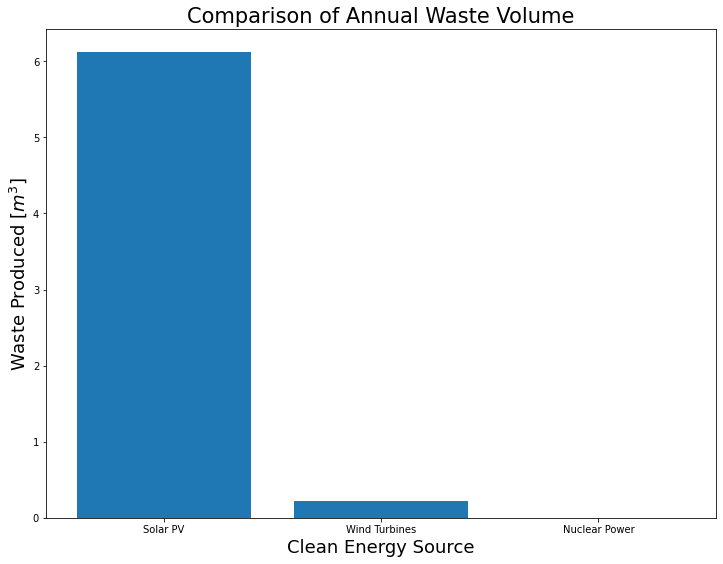

In [42]:
volwaste = {'Solar PV': sf_waste_vol,
            'Wind Turbines':wf_waste_vol, 
            'Nuclear Power': np_waste_vol}
 
keys = volwaste.keys()
values = volwaste.values()
 
plt.figure(figsize=(12,9), facecolor='w')
plt.title("Comparison of Annual Waste Volume", fontsize=21)
plt.xlabel("Clean Energy Source", fontsize=18)
plt.ylabel(r"Waste Produced [$m^3$]", fontsize=18)
plt.bar(keys, values)
# plt.grid()
plt.show()

### Including Very Low- and Low-Level Nuclear Waste

According to the WNA and the IAEA, 97-98% of waste produced annually is VLLW and LLW. Since we are just considering total accumulated waste, we can easily calculate a more pessimistic total volume of waste for nuclear power.
[[Source](https://www-pub.iaea.org/MTCD/Publications/PDF/P1799_web.pdf)]

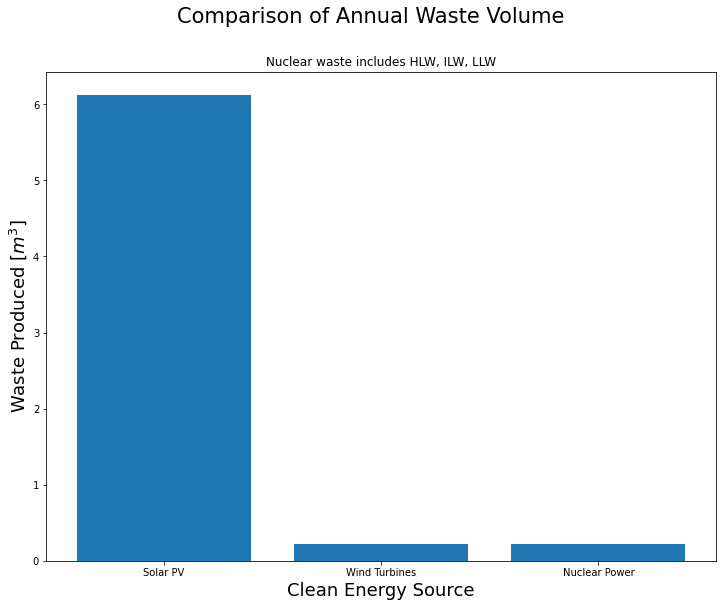

In [43]:
# frac_hlw = 0.02
# Most of the remaining waste is intermediate level waste, not HLW. 
# What happens if we make the HLW 1% of the total volume?
frac_hlw = 0.01

np_waste_combined = np_waste_vol / frac_hlw
volwaste['Nuclear Power'] = np_waste_combined


keys = volwaste.keys()
values = volwaste.values()
 
plt.figure(figsize=(12,9), facecolor='w')
plt.suptitle("Comparison of Annual Waste Volume", fontsize=21)
plt.title("Nuclear waste includes HLW, ILW, LLW")
plt.xlabel("Clean Energy Source", fontsize=18)
plt.ylabel(r"Waste Produced [$m^3$]", fontsize=18)
plt.bar(keys, values)
# plt.grid()
plt.show()

In [44]:
print(np_waste_combined)

0.2265030026663221


### Waste Volume Intensity

We can compare the intensity of each energy source by how much volume of waste is being produced per MWh.

In [45]:
wf_vol_intensity = wf_waste/wf_density
sf_vol_intensity = sf_waste/sf_density
np_vol_intensity = np_waste_combined/generation

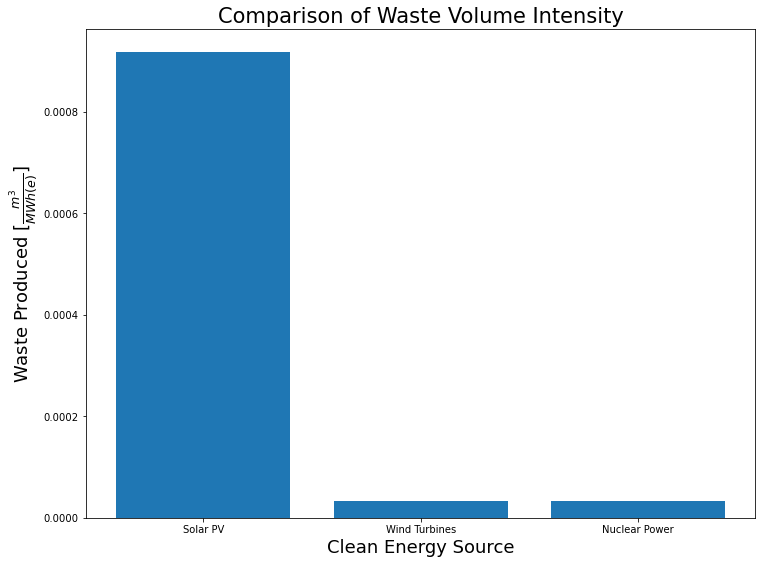

In [46]:
volintensity = {'Solar PV': sf_vol_intensity,
            'Wind Turbines':wf_vol_intensity, 
            'Nuclear Power': np_vol_intensity}
 
keys = volintensity.keys()
values = volintensity.values()
 
plt.figure(figsize=(12,9), facecolor='w')
plt.title("Comparison of Waste Volume Intensity", fontsize=21)
plt.xlabel("Clean Energy Source", fontsize=18)
plt.ylabel(r"Waste Produced [$\frac{m^3}{MWh(e)}$]", fontsize=18)
plt.bar(keys, values)
# plt.grid()
plt.show()